# LSTM (Long Short-Term Memory)
---
[LSTM Blog](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

**LSTM (Long Short-Term Memory) RNN** is a type of Recurrent Neural Network (RNN) specifically designed to address some of the significant limitations of traditional RNNs, particularly in handling long-term dependencies. Let's break this down:

### 1. **Traditional RNNs and Their Problems**
Recurrent Neural Networks (RNNs) are designed to process sequences of data by maintaining a hidden state that is updated at each time step. This hidden state acts as a memory, allowing the network to retain information about previous inputs in the sequence. However, traditional RNNs face several key problems:

- **Vanishing Gradient Problem:** During training, especially when using backpropagation through time (BPTT), the gradients used to update the network's weights can become extremely small (vanish). This makes it difficult for the RNN to learn from earlier time steps in long sequences, as the influence of these earlier steps diminishes.
  
- **Exploding Gradient Problem:** Conversely, the gradients can also become very large (explode), leading to unstable training and large updates to the model weights, which can cause the network to fail to converge.

- **Difficulty in Capturing Long-Term Dependencies:** Due to the vanishing gradient problem, traditional RNNs struggle to maintain relevant information over long sequences. This limits their ability to capture long-term dependencies in data, which is critical for tasks like language modeling or time series prediction.

### 2. **LSTM RNN: The Solution**

LSTM networks were designed to overcome these challenges by introducing a more sophisticated memory cell structure. Here's how LSTMs improve upon traditional RNNs:

- **Memory Cells and Gates:** LSTM networks introduce a memory cell that can maintain its state over time, which is regulated by three gates: the input gate, the forget gate, and the output gate.
  
  - **Input Gate:** Controls how much of the new input is written to the memory cell.
  - **Forget Gate:** Decides how much of the previous memory is discarded.
  - **Output Gate:** Determines how much of the memory is used to calculate the output.

- **Long-Term Dependency Learning:** The memory cell and gates allow LSTMs to retain information over long periods, effectively solving the problem of long-term dependencies. This is particularly useful in sequences where the relevant information may be far back in the input sequence.

- **Mitigating the Vanishing Gradient Problem:** The gating mechanisms in LSTMs ensure that gradients do not vanish as quickly, making it easier for the network to learn relationships across long sequences.

### 3. **Why LSTM is Better than Traditional RNNs**
- **Effective Learning of Long Sequences:** LSTMs can maintain and learn dependencies across longer sequences compared to traditional RNNs, making them more suitable for tasks like text generation, translation, and time series forecasting.

- **Stable Training:** By addressing the vanishing and exploding gradient problems, LSTMs tend to have more stable training compared to traditional RNNs.

### 4. **Applications of LSTM RNNs**
Due to their ability to handle long-term dependencies, LSTMs are widely used in various applications, including:
- **Natural Language Processing (NLP):** Tasks like machine translation, text generation, and sentiment analysis.
- **Speech Recognition:** Capturing the temporal dependencies in audio signals.
- **Time Series Forecasting:** Predicting future values based on past data in fields like finance and weather forecasting.

In summary, LSTM RNNs are an advanced type of RNN designed to overcome the limitations of traditional RNNs, particularly in capturing long-term dependencies and maintaining stable training over long sequences.

# LSTM Architecture

---

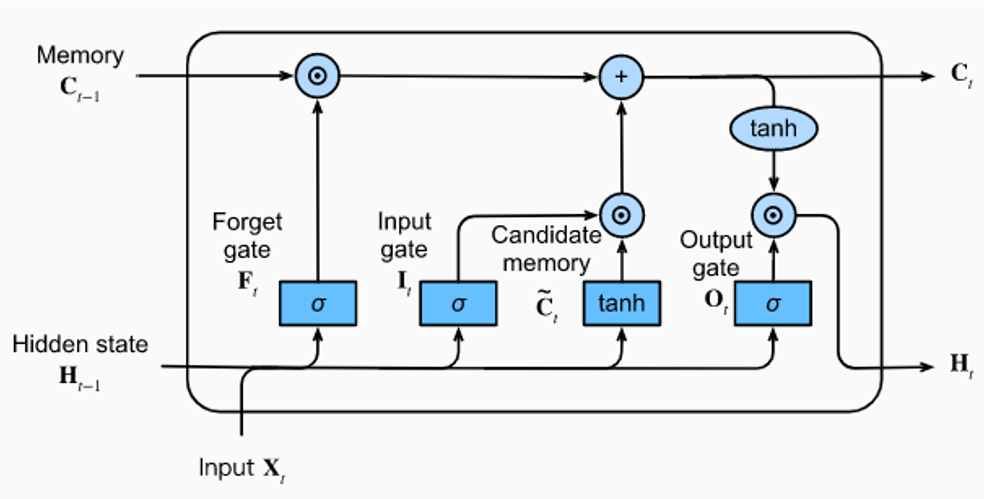

*[Image Source](https://medium.com/@ottaviocalzone/an-intuitive-explanation-of-lstm-a035eb6ab42c)*

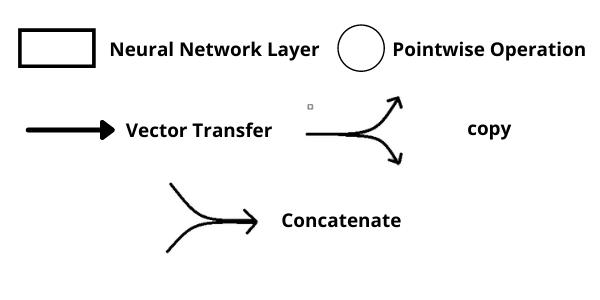

*[Image Source](https://images.app.goo.gl/BcGE9d8MYyfGFUrS6)*

Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network (RNN) architecture designed to capture long-term dependencies in sequences of data. Let’s break down the architecture using the diagram:

### 1. **Input Components:**
   - **Input $( X_t $):** This is the current input at time step $( t $).
   - **Previous Hidden State $( H_{t-1} $):** The hidden state from the previous time step. It contains the memory of the network from the previous time step.
   - **Previous Cell State $( C_{t-1} $):** The cell state from the previous time step. This state carries long-term information.

### 2. **Forget Gate $( F_t $):**
   - **Function:** Decides which part of the previous cell state $( C_{t-1} $) should be forgotten.
   - **Operation:** It takes the previous hidden state $( H_{t-1} $) and the current input $( X_t $) and passes them through a sigmoid activation function ($( \sigma $)). This produces an output between 0 and 1, where 0 means “completely forget” and 1 means “completely retain.”

### 3. **Input Gate $(I_t)$:**
   - **Function:** Determines which part of the current input should be added to the cell state.
   - **Operation:** The previous hidden state $( H_{t-1} $) and the current input $( X_t $) are passed through a sigmoid activation function ($ \sigma $), producing a value between 0 and 1.

### 4. **Candidate Memory $(\tilde{C}_t)$:**
   - **Function:** Creates a new candidate vector of information to potentially add to the cell state.
   - **Operation:** The previous hidden state $( H_{t-1} $) and the current input $( X_t $) are passed through a tanh activation function, which outputs values between -1 and 1.

### 5. **Cell State Update $( C_t $):**
   - **Function:** Combines the forget gate output, input gate output, and candidate memory to update the cell state.
   - **Operation:** 
     1. Multiply the previous cell state $( C_{t-1} $) by the forget gate $( F_t $) (this decides what to forget).
     2. Add the product of the input gate $( I_t $) and the candidate memory $(\tilde{C}_t)$ (this decides what new information to add).
     3. The result is the updated cell state $( C_t $).

### 6. **Output Gate $( O_t $):**
   - **Function:** Determines the output of the LSTM unit, which will be passed to the next time step.
   - **Operation:** The previous hidden state $( H_{t-1} $) and the current input $( X_t $) are passed through a sigmoid activation function $( \sigma)$, producing a value between 0 and 1. This value is then multiplied by the tanh of the updated cell state $( C_t $) to produce the next hidden state $( H_t)$.

### 7. **Final Outputs:**
   - **Updated Cell State $( C_t $):** This carries long-term information and will be passed to the next time step.
   - **Updated Hidden State $( H_t $):** This carries short-term information and will be passed to both the next time step and used as the output of the LSTM at the current time step.

### Summary:
- The LSTM architecture is designed to keep important information over long sequences by controlling what to remember, forget, and update using its gates (forget, input, output).
- The cell state $( C_t $) acts as the memory of the network, and the hidden state $( H_t $) is what the LSTM outputs at each time step.
- By using this mechanism, LSTMs can effectively capture dependencies that occur over long distances in sequence data, making them suitable for tasks like language modeling, time-series prediction, and more.

# Forget Gate
---

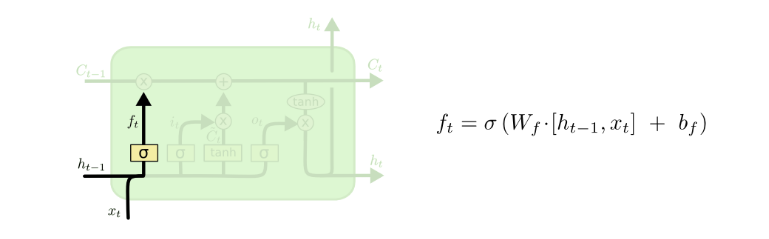

*[Image Source](https://images.app.goo.gl/KSdYbxnrNS8ykiyx7)*

The **Forget Gate** in an LSTM (Long Short-Term Memory) network plays a crucial role in deciding what information should be discarded from the cell state. Let's break down its purpose and how it works.

### **Purpose of the Forget Gate:**
The Forget Gate's main job is to decide how much of the previous information (from the cell state) should be kept or "forgotten." This is important because not all information from the past is useful for predicting future outcomes. By selectively forgetting some information, the LSTM can focus on the most relevant data.

### **How the Forget Gate Works:**
1. **Inputs:** The Forget Gate receives two pieces of information:
   - **The previous hidden state $( H_{t-1} )$**: This contains information about what the LSTM knew from the last time step.
   - **The current input $( X_t )$**: This is the new information at the current time step.

2. **Activation Function (Sigmoid):** 
   - Both the previous hidden state and the current input are passed through a sigmoid activation function (denoted as $( \sigma )$).
   - The sigmoid function outputs a value between 0 and 1 for each piece of information in the cell state. 
   - A value of **0** means "forget everything" (completely discard the information), while **1** means "keep everything" (completely retain the information).

3. **Multiplication:** 
   - The output from the Forget Gate is then multiplied by the previous cell state $(C_{t-1})$.
   - This multiplication operation selectively removes or keeps information in the cell state. If the Forget Gate outputs a 0 for a particular piece of information, that information is removed. If it outputs a 1, that information is kept.

### **Example to Illustrate:**
Imagine you are trying to understand a long story, and the LSTM is helping you by remembering important details. At each point in the story (each time step), the Forget Gate decides which details from earlier parts of the story are still important for the current context and which ones can be safely forgotten.

- If the Forget Gate decides that some earlier detail is no longer relevant, it "forgets" that detail (sets it to 0).
- If the detail is still relevant, it keeps it (sets it closer to 1).

By doing this, the LSTM can focus on the important parts of the story and make better predictions or decisions based on what it has learned so far.

### **Summary:**
- **Forget Gate** controls what information to discard from the cell state.
- It uses the previous hidden state and the current input to decide this.
- The decision is made using a sigmoid function that outputs a value between 0 (forget) and 1 (retain).
- This mechanism allows the LSTM to focus on relevant information and improve its ability to make predictions over long sequences.

# Input Gate and Candidate Memory
---

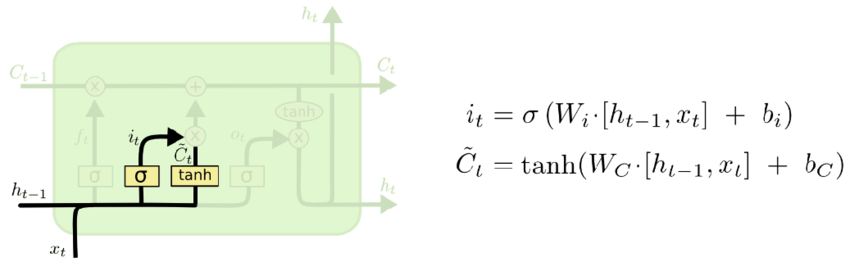

*[Image Source](https://www.researchgate.net/figure/The-process-of-input-gate-and-candidate-cell-state-11_fig4_368497779)*

In an LSTM (Long Short-Term Memory) network, the **Input Gate** and **Candidate Memory** work together to update the cell state with new information.

### **Input Gate:**
The Input Gate controls how much of the new information (current input) should be added to the cell state.

#### **Purpose:**
The Input Gate decides what portion of the new information from the current time step is important enough to be stored in the cell state, contributing to the "memory" of the network.

#### **How It Works:**
1. **Inputs:** The Input Gate takes in:
   - **The previous hidden state $( H_{t-1} )$**: What the LSTM "knew" from the last time step.
   - **The current input $( X_t )$**: The new information at the current time step.

2. **Activation Function (Sigmoid):**
   - Both inputs are passed through a sigmoid activation function ($( \sigma $)), which outputs a value between 0 and 1 for each piece of the information.
   - **0** means "ignore this information" (don’t add it to the cell state), and **1** means "store this information" (add it to the cell state).

### **Candidate Memory $( \tilde{C}_t )$:**
The Candidate Memory generates potential new information that could be added to the cell state.

#### **Purpose:**
The Candidate Memory creates a new vector of information that represents possible updates to the cell state based on the current input and the previous hidden state. It essentially suggests what new information might be relevant to add to the cell state.

#### **How It Works:**
1. **Inputs:** Like the Input Gate, the Candidate Memory takes in:
   - **The previous hidden state $( H_{t-1} $)**
   - **The current input $( X_t $)**

2. **Activation Function (Tanh):**
   - These inputs are passed through a tanh activation function, which outputs values between -1 and 1.
   - The tanh function allows the LSTM to capture both positive and negative information, which can be important for tasks where the sign of the data matters.

### **Combining Input Gate and Candidate Memory:**
1. **Element-wise Multiplication:** 
   - The output of the Input Gate (values between 0 and 1) is multiplied element-wise with the Candidate Memory.
   - This multiplication determines how much of the suggested new information (Candidate Memory) should actually be added to the cell state.

2. **Updating the Cell State:**
   - The product of the Input Gate and Candidate Memory is then added to the cell state (alongside the information retained by the Forget Gate).
   - This updated cell state $( C_t )$ now contains a mix of old information (retained by the Forget Gate) and new, relevant information (filtered by the Input Gate).

### **Example to Illustrate:**
Imagine you’re reading a book, and you learn a new fact at each time step. The Input Gate is like your mind deciding whether this new fact is important enough to remember for later.

- If it’s important, the Input Gate lets it pass through.
- The Candidate Memory suggests how this new fact should be stored—maybe it’s a positive or negative piece of information.
- Together, they decide how much of this new fact should be added to your memory.

### **Summary:**
- **Input Gate**: Decides what new information from the current input should be added to the cell state.
- **Candidate Memory**: Creates potential new information that could be added to the cell state.
- Together, they update the cell state with relevant new information while filtering out unnecessary details. This helps the LSTM maintain a useful memory that can make accurate predictions over time.

# Output Gate
---

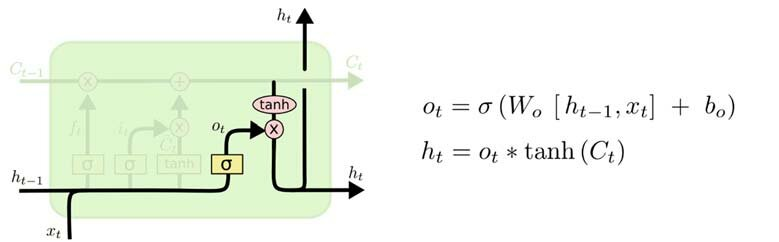

*[Image Source](https://www.researchgate.net/figure/The-final-step-of-the-LSTM-neural-network-approach_fig2_349940017)*

The **Output Gate** in an LSTM (Long Short-Term Memory) network is responsible for determining what information from the cell state should be used to produce the output at the current time step.

### **Purpose of the Output Gate:**
The Output Gate's main job is to control what information from the cell state should be passed on to the next time step as the hidden state and what should be outputted by the LSTM at the current time step. This helps the LSTM decide what the next "memory" should focus on and what the network should output to the next layer (or to the final prediction, depending on the task).

### **How the Output Gate Works:**
1. **Inputs:** The Output Gate takes in:
   - **The previous hidden state $( H_{t-1} )$:** The information from the last time step.
   - **The current input $( X_t )$:** The new information from the current time step.

2. **Activation Function (Sigmoid):**
   - These inputs are passed through a sigmoid activation function $( \sigma )$, which outputs values between 0 and 1 for each piece of information.
   - A value of **0** means "ignore this information" (do not include it in the output), and **1** means "include this information" (fully include it in the output).

3. **Tanh Function on Cell State:**
   - The updated cell state $( C_t )$ is passed through a tanh activation function, which compresses its values between -1 and 1. This prepares the cell state for output.

4. **Combining Output Gate and Cell State:**
   - The output of the tanh function (which is a version of the cell state $( C_t )$ with values between -1 and 1) is then multiplied element-wise by the output of the Output Gate (which has values between 0 and 1).
   - This multiplication decides what part of the cell state should be outputted as the new hidden state $( H_t )$ for the current time step.

### **Final Output:**
- The result of this multiplication is the new hidden state $( H_t )$, which serves two purposes:
  1. **It is the output of the LSTM for the current time step.** This could be used as input to the next layer in a neural network, or as the final output in sequence tasks like language modeling.
  2. **It is also passed to the next time step** as $(H_t)$, helping the LSTM to maintain relevant information over time.

### **Example to Illustrate:**
Imagine you’re writing a story, and each time step is a sentence. The Output Gate is like deciding what information (from all the details and ideas in your mind) should be included in the sentence you’re about to write.

- If certain details are relevant to the current part of the story, the Output Gate allows them to be included in the sentence.
- If they aren’t relevant, the Output Gate filters them out, so they aren’t included in the sentence.

This way, each sentence (or output) is focused and relevant to the ongoing story.

### **Summary:**
- **Output Gate**: Controls what part of the information in the cell state should be passed on as the output and the next hidden state.
- It combines the updated cell state (processed by the tanh function) with the decision made by the Output Gate (through the sigmoid function) to produce the final output of the LSTM for that time step.
- This allows the LSTM to focus on relevant information for each time step and ensure that only the most useful information is passed forward and outputted.

# Training Process of LSTM RNN
---

#### Overview of LSTM Architecture
LSTM consists of three main gates:
1. **Forget Gate**: Decides what information to discard from the cell state.
2. **Input Gate**: Decides which new information to store in the cell state.
3. **Output Gate**: Determines what information to output based on the cell state.

#### Example Task: Sentiment Analysis of Restaurant Reviews
Given a text paragraph containing reviews about a restaurant's food, the task is to predict whether the food is good or bad. The input text is converted into vectors, and the LSTM processes these vectors over time, updating its internal states to make predictions.

#### Step-by-Step Training Process

1. **Text to Vectors Conversion**:
   - Each word in the text is converted into a vector using techniques like Word2Vec.
   - Example: The word "tasty" might be represented by a vector `[0.9, 0.0, 0.1]`, where each value corresponds to the relationship of the word with predefined features like "good", "bad", and "healthy".

2. **Sequential Data Processing**:
   - The LSTM processes the text word by word, updating its states (short-term and long-term memory) with each word.
   - The initial states are set, and the first word vector is passed through the LSTM gates.

3. **Forget Gate Operation**:
   - The forget gate decides which part of the previous cell state should be discarded. For instance, if new information contradicts previous data, the LSTM will reduce the importance of the old information.

4. **Input Gate and Candidate Memory**:
   - The input gate determines which new information to add to the cell state.
   - The candidate memory is updated based on the new word's vector. For example, when the word "tasty" is encountered, the cell state might increase the value related to "good" and slightly adjust the "healthy" score.

5. **Output Gate**:
   - The output gate decides what the next hidden state should be, which influences the final output prediction.
   - The current word vector influences the output by combining relevant information from both the short-term and long-term memory.

6. **Memory Cell Update**:
   - The cell state (long-term memory) is continuously updated, incorporating the most relevant information and discarding less important data as new words are processed.

7. **Final Output**:
   - After processing all the words, the final output is generated, indicating the sentiment of the food review based on the accumulated information.

#### Key Points:
- LSTM selectively remembers and forgets information, making it suitable for tasks with long-term dependencies.
- The gates in LSTM allow for fine-tuning of what information is kept, added, or removed, enabling the network to make accurate predictions based on the context.Output Gate

# Training Process of LSTM RNN with a Simple Example
---
In this example, we'll break down the training process of an LSTM (Long Short-Term Memory) Recurrent Neural Network (RNN) using a straightforward scenario.

#### Scenario: Predicting Sentiment of Restaurant Reviews

**Goal:** Based on the text reviews of a restaurant, we want to predict whether the food is good or bad.

#### Example Review:
"Hey, I went to the restaurant and ordered a burger. The burger looked tasty and crispy, but it's not good for health. It has a lot of fats and cholesterol, but this burger was made with whey protein and only vegetables, so it was good."

**Output:** Based on this review, the output should be `1`, indicating that the burger is good.

### Step-by-Step Training Process:

1. **Input Representation:**
   - Each word in the review is converted into a vector using techniques like Word2Vec. For simplicity, let's assume that each word is represented by a 3-dimensional vector.

   Example: 
   - "tasty" might be represented as `[0.9, 0.0, 0.1]` where these values correspond to relationships with concepts like "good", "bad", and "healthy".

2. **LSTM Architecture Overview:**
   - LSTM uses three main gates to process this input data: 
     - **Forget Gate**
     - **Input Gate**
     - **Output Gate**
   - Additionally, LSTM maintains a **memory cell** that stores information over time.

3. **Passing Words Through the LSTM:**
   - As each word from the review is passed through the LSTM, the gates determine what information should be added to or removed from the memory cell.
   
   - **Forget Gate:** Decides which information from the previous state should be discarded.
   
   - **Input Gate and Candidate Memory:** Adds new relevant information to the memory.
   
   - **Output Gate:** Produces the output based on the current state of the memory.

4. **Processing the Review:**
   - **First Sentence:** "I went to the restaurant and ordered a burger."
     - This might not carry much sentiment information, so the Forget Gate might choose to ignore this.
   
   - **Second Sentence:** "The burger looked tasty and crispy."
     - The word "tasty" has a strong positive sentiment, so the Input Gate adds this to the memory, updating the vector for "good".

   - **Third Sentence:** "But the burger is not good for health."
     - Here, the sentiment is negative ("not good for health"), so the Forget Gate might reduce the positive sentiment value, and the Input Gate will increase the "bad" sentiment in the memory.

   - **Fourth Sentence:** "It has a lot of fats and cholesterol."
     - This continues to build on the negative sentiment, further increasing the "bad" value in the memory.

   - **Fifth Sentence:** "But this burger was made with whey protein and only vegetables, so it was good."
     - The positive sentiment is reintroduced ("whey protein and vegetables"), so the Input Gate increases the "good" value, and the Output Gate might produce a final positive output.

5. **Final Prediction:**
   - After processing the entire review, the LSTM evaluates the values in the memory cell to predict the sentiment.
   - In this case, it might predict `1` (good) because the final sentence was positive, and the positive sentiment outweighed the negative sentiment.

### Conclusion:
The LSTM processes each word in the context of the entire review, updating its memory at each step. The gates allow the network to retain important information while discarding irrelevant details. Over time, with training, the LSTM becomes better at making these predictions, leading to accurate sentiment analysis of the text.

# Variants Of LSTM RNN

### Variant 1: Peephole Connections

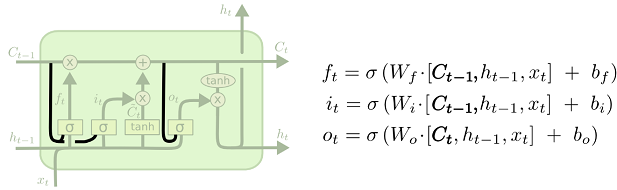

- **Introduction**: This variant involves peephole connections, which allow the gates (forget, input, and output) to look at the cell state while making decisions. The variant was introduced by researchers Girs and Schmidhuber.
- **Key Idea**: Peephole connections provide additional information from the memory cell to the gates, allowing them to make better decisions regarding what to forget, what to add, and what to output.
- **Architecture**: The peephole connections send information from the memory cell to the forget gate, input gate, and output gate, thereby improving the decision-making process.

### Variant 2: Coupled Forget and Input Gates

- **Introduction**: This variant couples the forget and input gates to make decisions simultaneously rather than separately. 
- **Key Idea**: The main idea is that the network only forgets old information when it has new information to input. This coupling ensures that the network's memory is efficiently managed by only adding new information when something old is being removed.
- **Architecture**: Unlike traditional LSTMs where the forget and input gates function independently, this variant ties them together, making the decision process more efficient.

### Conclusion:
These variants demonstrate how LSTM RNNs can be modified to enhance their performance in specific tasks. Peephole connections improve decision-making by providing gates with more context, while coupled gates streamline the process of memory management. Understanding these variants is crucial for anyone looking to dive deeper into the workings of LSTMs and their applications in advanced AI systems.

# GRU RNN 
---
A **GRU (Gated Recurrent Unit) RNN** is a type of recurrent neural network (RNN) architecture that is designed to handle sequential data and address some of the limitations of traditional RNNs, particularly the problem of vanishing gradients, which can make it difficult for RNNs to learn long-term dependencies.

### Key Features of GRU:

1. **Gated Mechanisms:**
   - **Update Gate:** This gate controls how much of the past information needs to be passed along to the future. It helps in deciding the extent to which the past state contributes to the current state.
   - **Reset Gate:** This gate controls how much of the past information to forget. It decides how much of the past information should be retained in the current state.

2. **Simplified Structure:**
   - Unlike the LSTM, which uses three gates (input, forget, and output) and a memory cell, GRU combines the forget and input gates into a single update gate and does not have a separate memory cell. This makes the GRU simpler and computationally more efficient than LSTM, while still being able to capture dependencies over time.

3. **Better at Learning Short Sequences:**
   - Due to its simpler structure, GRUs can be better at learning from smaller datasets or shorter sequences.

### How GRU Works:

- **Update Gate (z):** Determines the extent to which the previous state information will be carried forward to the current state. If the update gate value is close to 1, the model retains much of the previous information; if it’s close to 0, the model mostly relies on the new input.

- **Reset Gate (r):** Controls how much of the previous state should be ignored or forgotten. If the reset gate value is close to 0, the model effectively "resets" and ignores the previous state, focusing more on the current input.

### GRU Equation Overview:

1. **Update Gate:**
   $$
   z_t = \sigma(W_z \cdot [h_{t-1}, x_t])
   $$
   Here, $( h_{t-1} )$ is the previous hidden state, and $( x_t )$ is the current input. $( W_z )$ is the weight for the update gate.

2. **Reset Gate:**
   $$
   r_t = \sigma(W_r \cdot [h_{t-1}, x_t])
   $$
   Similar to the update gate, $( r_t )$ determines how much past information to reset.

3. **Current Memory Content:**
   $$
   \tilde{h}_t = \tanh(W \cdot [r_t * h_{t-1}, x_t])
   $$
   This equation determines the new memory content, using the reset gate to decide how much of the previous hidden state to consider.

4. **Final Memory at Time t:**
   $$
   h_t = (1 - z_t) * h_{t-1} + z_t * \tilde{h}_t
   $$
   This combines the past memory and the new memory content to get the final state at time $ ( t )$.

### Advantages of GRU:

- **Simpler Model:** With fewer parameters than LSTM, GRUs are computationally less expensive and faster to train.
- **Effective in Practice:** GRUs often perform comparably to LSTMs on various tasks, making them a popular choice for many sequence-based problems, including language modeling, time series prediction, and more.

### Applications of GRU RNN:

- **Natural Language Processing (NLP):** GRUs are widely used in NLP tasks such as sentiment analysis, machine translation, and text generation.
- **Time Series Prediction:** They are also used in predicting sequences like stock prices, weather forecasting, and more.
- **Speech Recognition:** GRUs are employed in systems that need to model sequential data, like recognizing spoken words or sentences.

In summary, GRU RNNs are a powerful and efficient tool for handling sequential data, offering a balance between complexity and performance.


# Understanding GRU (Gated Recurrent Unit) RNN - Intuition

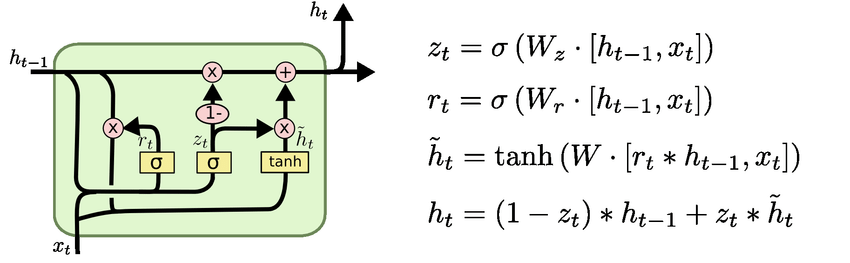

*[Image Source](https://www.researchgate.net/figure/The-architecture-of-the-GRU-cell-Ola-2015_fig5_337801064)*

The Gated Recurrent Unit (GRU) is a variant of the Recurrent Neural Network (RNN) designed to handle the vanishing gradient problem that traditional RNNs face. It was introduced as a simpler alternative to LSTM (Long Short-Term Memory), offering comparable performance but with fewer parameters. Let's break down the GRU cell's architecture and equations.

#### Key Components of GRU

1. **Reset Gate $( r_t )$**:
   - Purpose: Determines how much of the past information (previous hidden state $(h_{t-1} )$ to forget.
   - Equation: $( r_t = \sigma(W_r \cdot [h_{t-1}, x_t]) )$
   - Explanation: The reset gate decides whether to ignore the previous hidden state completely or to reset it, helping the model focus on new information.

2. **Update Gate $( z_t )$**:
   - Purpose: Controls how much of the past information (previous hidden state $( h_{t-1} )$ should be carried forward to the next step.
   - Equation: $(z_t = \sigma(W_z \cdot [h_{t-1}, x_t]))$
   - Explanation: The update gate determines how much of the previous hidden state to keep and how much to update with new information. It is similar to the combination of the forget and input gates in LSTM.

3. **Candidate Hidden State $( \tilde{h}_t )$**:
   - Purpose: Generates the new information that could be added to the hidden state.
   - Equation: $(\tilde{h}_t = \tanh(W \cdot [r_t \ast h_{t-1}, x_t])$
   - Explanation: The candidate hidden state is created by combining the reset hidden state (using the reset gate) and the current input. It represents the potential new state.

4. **Final Hidden State $( h_t )$**:
   - Purpose: Represents the output of the GRU cell, combining the old and new information.
   - Equation: $( h_t = (1 - z_t) \ast h_{t-1} + z_t \ast \tilde{h}_t )$
   - Explanation: The final hidden state is a weighted sum of the previous hidden state and the candidate hidden state, controlled by the update gate. This allows the GRU to decide how much of the old information to retain and how much of the new information to incorporate.

### Intuition Behind GRU Functionality

- **Balancing Old and New Information**: The update gate $( z_t )$ acts like a switch that balances how much of the past information (from $ h_{t-1} )$ should be kept and how much new information $( \tilde{h}_t )$ should be added. If $( z_t )$ is close to 1, the GRU will retain more of the new information, and if it's close to 0, it will prioritize the old information.

- **Selective Memory**: The reset gate $( r_t )$ allows the GRU to selectively forget the irrelevant parts of the past, enabling the network to reset itself as needed when new and important information comes in.

- **Efficient Learning**: GRUs are more efficient than LSTMs because they have fewer gates and thus fewer parameters to train. This simplicity allows GRUs to be computationally faster while still retaining the ability to capture long-term dependencies.

### Summary

The GRU cell is an effective and simplified RNN variant that uses gates to manage the flow of information. The reset gate controls what part of the past to forget, while the update gate balances old and new information to produce the final hidden state. This design allows GRUs to perform well in tasks involving sequential data while being more efficient than LSTMs.

# Formula
---
### 1. **Update Gate ($( z_t $))**:  
   - **Formula**: $( z_t = \sigma(W_z \cdot [h_{t-1}, x_t]) $)  
   - **Explanation**: 
     - **What it does**: The update gate controls how much of the past hidden state should be carried forward to the current time step.
     - **Breaking it down**:
       - $( h_{t-1} $) is the hidden state from the previous time step.
       - $( x_t $) is the input at the current time step.
       - $( [h_{t-1}, x_t] $) means the previous hidden state and the current input are combined (concatenated).
       - $( W_z $) is a weight matrix that will be learned during training, which decides how the combined information should be processed.
       - $( \sigma $) is the sigmoid function, which squashes the output to be between 0 and 1, helping the gate decide the proportion of past information to retain or discard.

### 2. **Reset Gate ($( r_t $))**:
   - **Formula**: $( r_t = \sigma(W_r \cdot [h_{t-1}, x_t]) $)  
   - **Explanation**: 
     - **What it does**: The reset gate determines how much of the past information should be forgotten or "reset" before passing it to the next step.
     - **Breaking it down**:
       - Similar to the update gate, $( h_{t-1} $) and $( x_t $) are combined.
       - $( W_r $) is another weight matrix specific to the reset gate.
       - $( $sigma $) is again the sigmoid function, determining the extent to which the previous hidden state should be reset or forgotten.

### 3. **Candidate Hidden State ($( \tilde{h}_t $))**:
   - **Formula**: $( \tilde{h}_t = \tanh(W \cdot [r_t \ast h_{t-1}, x_t]) $)
   - **Explanation**:
     - **What it does**: This step generates the new information that could potentially update the hidden state.
     - **Breaking it down**:
       - $( r_t \ast h_{t-1} $) means the previous hidden state $( h_{t-1} $) is first scaled by the reset gate $( r_t $). If $( r_t $) is close to 0, it forgets more; if it’s close to 1, it retains more of the past.
       - $( W $) is a weight matrix that transforms the combined information $( [r_t \ast h_{t-1}, x_t] $) into a new candidate hidden state.
       - $( \tanh $) is the hyperbolic tangent function, which squashes the output to be between -1 and 1, helping to form the new candidate hidden state $( $tilde{h}_t $).

### 4. **Final Hidden State ($( h_t $))**:
   - **Formula**: $( h_t = (1 - z_t) \ast h_{t-1} + z_t \ast \tilde{h}_t $)
   - **Explanation**:
     - **What it does**: This equation computes the final hidden state by blending the previous hidden state and the candidate hidden state.
     - **Breaking it down**:
       - $( 1 - z_t $) determines how much of the old hidden state $( h_{t-1} $) should be kept. If $( z_t $) is close to 0, most of the old state is kept; if $( z_t $) is close to 1, less is kept.
       - $( z_t \ast \tilde{h}_t $) determines how much of the new candidate hidden state $( \tilde{h}_t $) should be added to the final hidden state.
       - The final hidden state $( h_t $) is thus a combination of the old state and the new candidate state, controlled by the update gate $( z_t $).

### Summary

- **Update Gate $( z_t $)**: Decides how much of the past information to keep.
- **Reset Gate $( r_t $)**: Decides how much of the past information to forget.
- **Candidate Hidden State $( \tilde{h}_t $)**: Generates new information based on the current input and the reset past.
- **Final Hidden State $( h_t $)**: Combines the old state with the new information to produce the final output for the current time step.

This process allows the GRU to retain important information over long sequences while efficiently updating itself with new information at each step.
